
# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# PROBLEM STATEMENT

## .To Build a predictive model and predict the sales of each product at a particular outlet.


# Loading the dataset

In [2]:
df=pd.read_csv('Bigmart_Sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis (EDA)

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


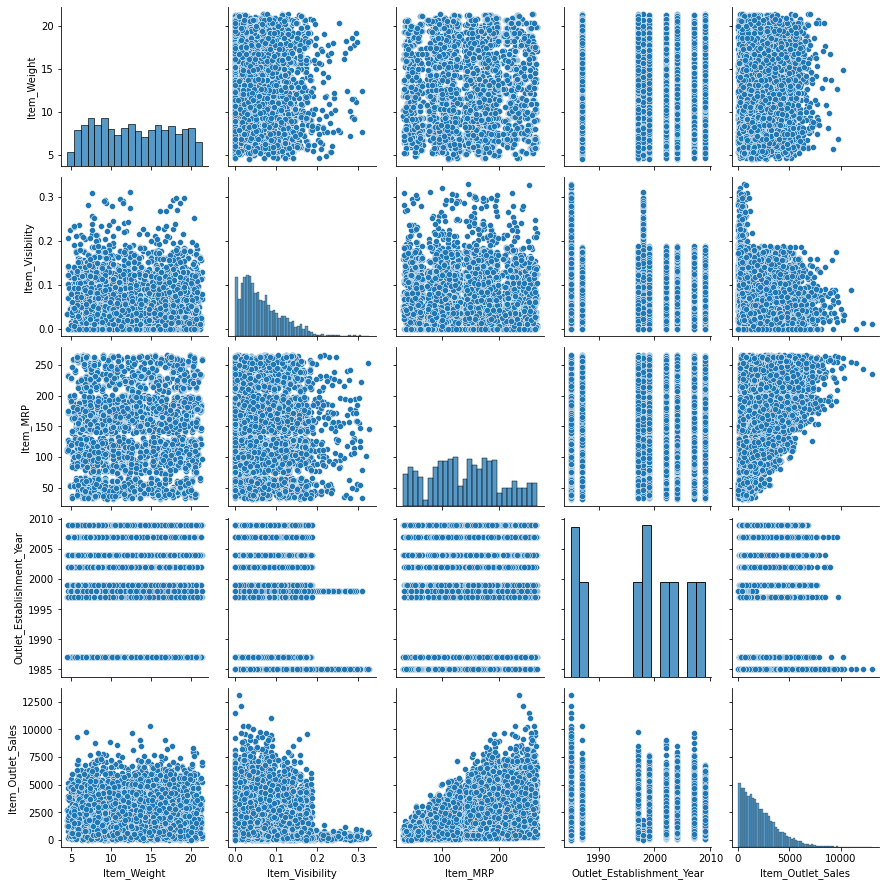

In [4]:
sns.pairplot(df)

In [5]:
#As we can see, we don't have any clear distribution of the Item_MRP & Outlet_Establishment_Year
# data is not normally disributed
#the item visibility & Item_Outlet_Sales  col has a right skew
#There is not much correlation between other col

# Handaling missing values

In [6]:
df.isnull().sum() #item_weight 17 % miss val & Outlet_Size 28% miss val use fillna

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Use fillna() function to use mean , median, mode

In [7]:
# impute missing val with mean ( num.variable able)

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
#Impute missing val with mode(categorical varible)

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# outliers

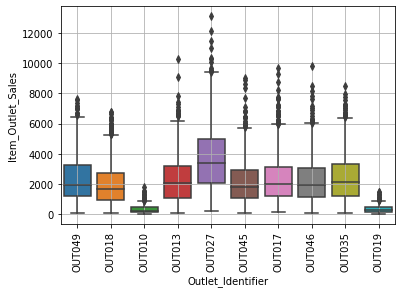

In [12]:
# detect the outliers
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data =df) # outliers
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [13]:
# Removing all outliers

def whishkers(col):
    q1 = np.quantile(col,0.25)
    q3 = np.quantile(col,0.75)
    iqr = q3-q1
    uq = q3 + (1.5 *iqr)
    lq = q1 - (1.5 *iqr)
    return uq, lq
def outlier_index(df, col):
    indexlist = []
    uq, lq = whishkers(df[col])
 
    for m in df[col]:
        if(m>uq):
            index = df.index[df[col]==m].tolist()[0]
            indexlist.append(index)
        elif(m<lq):
            index = df.index[df[col]==m].tolist()[0]
            indexlist.append(index)
        else:
            pass
    return indexlist

In [14]:
Outlet_Identifier = df["Outlet_Identifier"].unique().tolist()

In [15]:
Outlet_Identifier

['OUT049',
 'OUT018',
 'OUT010',
 'OUT013',
 'OUT027',
 'OUT045',
 'OUT017',
 'OUT046',
 'OUT035',
 'OUT019']

In [16]:
for OI in Outlet_Identifier:
    index = outlier_index(df[df["Outlet_Identifier"]==OI], "Item_Outlet_Sales")
    print(index)
    df.drop(index, inplace=True)

[145, 424, 915, 1506, 1601, 1650, 1821, 3494, 6765, 7926, 8245]
[43, 55, 423, 641, 1103, 1508, 1832, 1945, 2282, 2643, 2803, 2841, 2887, 3583, 3756, 3999, 4481, 4683, 4841, 5042, 5253, 5357, 5593, 5796, 6031, 6132, 6267, 6562, 6789, 6868, 6267, 7961, 8328]
[547, 1120, 1380, 1824, 1875, 1988, 2479, 2527, 3180, 3227, 3419, 4518, 4530, 4910, 5199, 5434, 5455, 5529, 6576, 6636, 6909, 1875, 7759, 7809]
[276, 1835, 2680, 3087, 3894, 4305, 4888, 4915, 5413, 5775, 5866, 5969, 5413, 6409, 6568, 6569, 7560]
[1009, 1450, 3098, 4349, 5223, 5500, 6541, 6606, 7188, 7191, 7752, 8201]
[47, 240, 304, 337, 831, 1044, 1341, 1658, 1709, 1751, 1879, 831, 2216, 2293, 3033, 3584, 4236, 4933, 5236, 5390, 6722, 6818, 7256, 6722, 8039, 8395]
[243, 997, 1012, 1370, 1705, 2535, 2830, 3255, 3590, 3863, 3979, 4094, 4568, 4699, 4961, 5315, 5474, 5550, 5577, 6599, 6993, 7025, 7076, 7543, 3979, 7956, 8208, 8447]
[753, 1254, 1669, 1903, 2516, 2528, 3073, 3075, 3245, 4289, 4468, 4991, 5292, 5322, 6932, 7118, 8087]
[373,

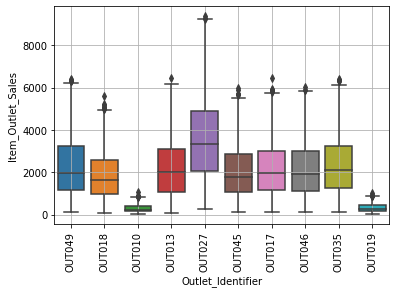

In [17]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data =df)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

# Data Analysis

In [18]:
#Give statistical measure about the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000
mean,12.855952,0.066153,138.949076,1997.799063,2094.326598
std,4.230178,0.051599,61.386472,8.370008,1576.136303
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.302500,0.027035,92.980400,1987.000000,809.945700
50%,12.857645,0.053812,141.098300,1999.000000,1761.706800
75%,16.000000,0.094697,183.352900,2004.000000,3020.068800
max,21.350000,0.328391,266.888400,2009.000000,9371.800800


observation: 
    
. count shows total col all the numerical col & mean shows average of the col

. Each are there own mean,std div.,min values & max values


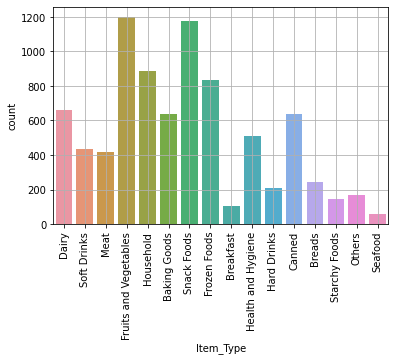

In [19]:
#Item_Type col
sns.countplot(x='Item_Type',data=df)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

Observations:

.Fruits and Vegetables are largely sold as people tend to use them on daily purpose.

.Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

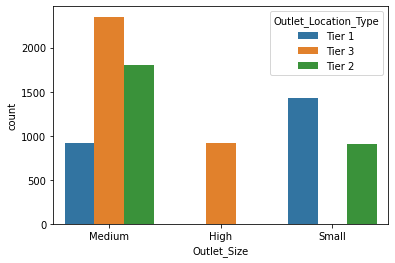

In [20]:
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type']) 

Observations:
we have three outlet size small, medium,High  
1)Tier 3 cities have the highest no.of Stores Medium  outlet_size

2)Tier 1 cities have highest no of Stores Small  outlets_size

3)Tier 3 cities have the least no. of Stores High  outlets_size

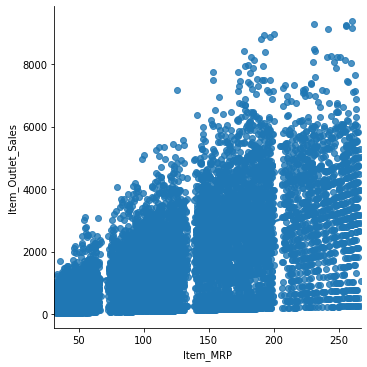

In [21]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

Observations: As the MRP of an item increases item outlet sales also increases

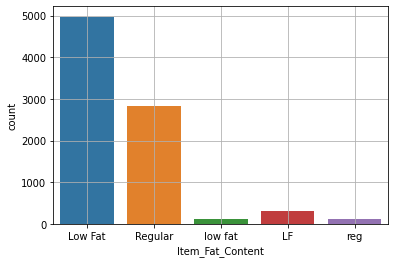

In [22]:
sns.countplot(x='Item_Fat_Content',data=df) #Item_Fat_Content column, has repeating values with different names
plt.grid(True)
plt.show()

In [23]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular','LF' :'Low Fat'}},inplace=True)

In [24]:
df['Item_Fat_Content'].value_counts() 

Low Fat    5389
Regular    2937
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

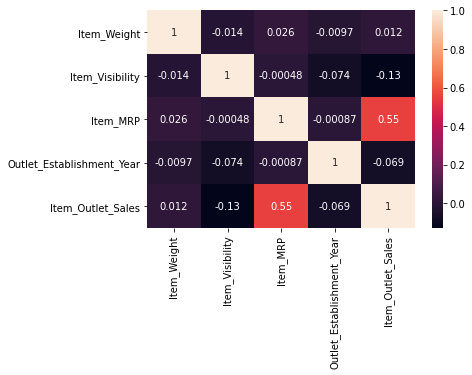

In [25]:
sns.heatmap(df.corr(),annot=True)

observation:

Item_MRP has the  positive correlation with item_outlet_Sales

while visibility and establishment show a little negative correlation. 

There is not much correlation between Item_Weight & Item_Outlet_Sales col


# Label Encoding

In [26]:
#devide dataset
df_cat=df.select_dtypes(object)

df_num=df.select_dtypes(['int64', 'float64'])

In [27]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [28]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df_cat['Item_Identifier']) 

array([ 156,    8,  662, ..., 1357,  681,   50])

In [30]:
 #Label Encoded
    
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])


In [31]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,1,2,0
4,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1
8519,897,1,0,7,1,1,1
8520,1357,0,8,6,2,1,1
8521,681,1,13,3,1,2,2


In [32]:
# join the data set[cat, num] use #pd.concat

df=pd.concat([df_cat, df_num], axis=1)

In [33]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,156,0,4,9,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,8,1,14,3,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,662,0,10,9,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,1121,1,6,0,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1297,0,9,1,0,2,1,8.93,0.000000,53.8614,1987,994.7052


# skewness

**.skewness (basically numerical col)**

**.skewness is basically Measure of asymmetric**

In [34]:
df.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000
mean,779.833413,0.352750,7.227480,4.737329,1.170550,1.110978,1.204060,12.855952,0.066153,138.949076,1997.799063,2094.326598
std,449.122514,0.477855,4.212967,2.837343,0.601282,0.813361,0.796713,4.230178,0.051599,61.386472,8.370008,1576.136303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,395.250000,0.000000,4.000000,2.000000,1.000000,0.000000,1.000000,9.302500,0.027035,92.980400,1987.000000,809.945700
50%,784.000000,0.000000,6.000000,5.000000,1.000000,1.000000,1.000000,12.857645,0.053812,141.098300,1999.000000,1761.706800
75%,1166.000000,1.000000,10.000000,7.000000,2.000000,2.000000,1.000000,16.000000,0.094697,183.352900,2004.000000,3020.068800
max,1558.000000,1.000000,15.000000,9.000000,2.000000,2.000000,3.000000,21.350000,0.328391,266.888400,2009.000000,9371.800800


In [35]:
#to find which types of skewnwss--> num col

from scipy.stats import skew

Item_Weight
0.08954582848756386


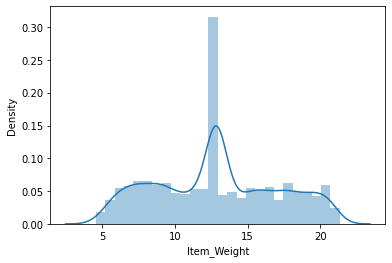

Item_Visibility
1.1646039552566378


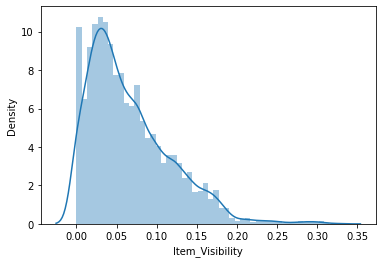

Item_MRP
0.14818776754479313


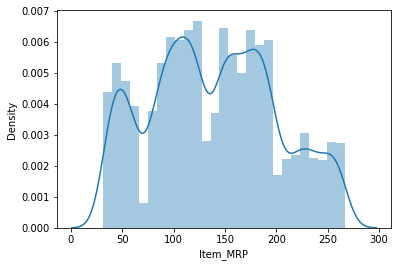

Outlet_Establishment_Year
-0.3923516393511819


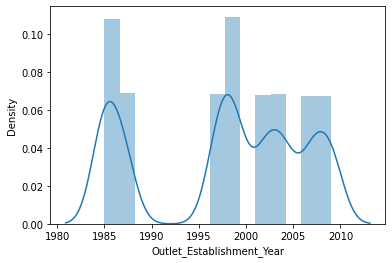

Item_Outlet_Sales
0.983903170611901


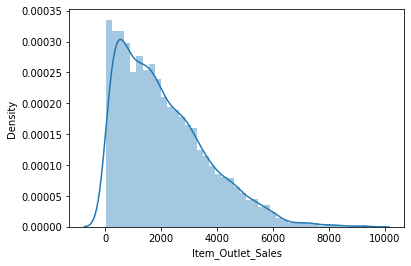

In [36]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col]) # type of skewness
    plt.show()

<AxesSubplot:>

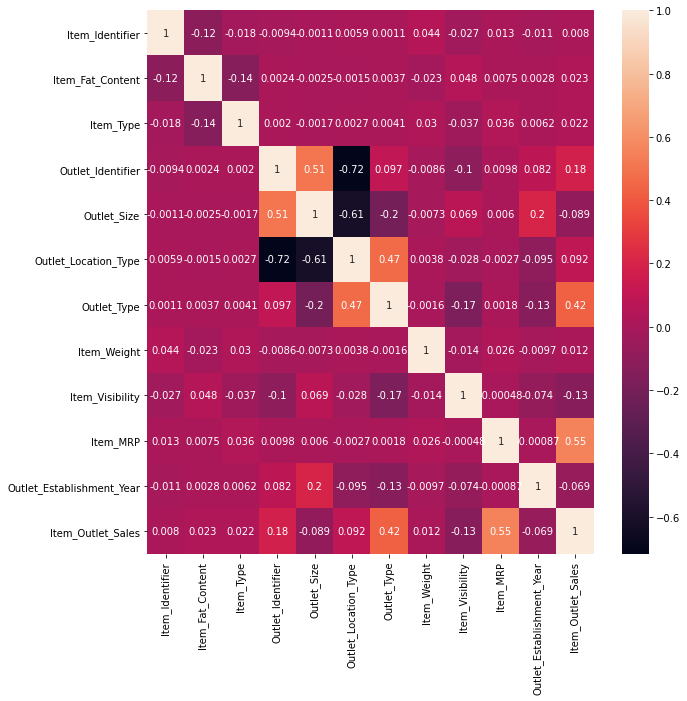

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

.As we can see here No need to handling skewness #item_MRP & #item_outlet_sales col shows positive corr.

 .Item_Visibility & #Outlet_Establishment_Year col is negative corr. & Item_Weight is 0% skewed

In [38]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,156,0,4,9,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,8,1,14,3,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,662,0,10,9,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,1121,1,6,0,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1297,0,9,1,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [39]:
#devide x &  y

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Model Training

In [40]:
#trai_test_split

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)

# .LinearRegression
# .SVR
# .DecisionTreeRegressor
# .RandomForestRegressor

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [42]:
def regression_report(ytest, ypred):
    print(f"MSE -> {mean_squared_error(ytest, ypred)}")
    print(f"RMSE -> {np.sqrt(mean_squared_error(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)}\n\n\n")

In [43]:

def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    regression_report(ytest, ypred)

In [44]:
models = []

models.append( ("linreg ->", LinearRegression()))
models.append( ("SVM-linear ->", SVR(kernel="linear")))
models.append( ("SVM-rbf ->", SVR(kernel="rbf")))
models.append( ("DT ->", DecisionTreeRegressor()))
models.append( ("RF ->", RandomForestRegressor()))

for name, model in models:
    print(name)
    mymodel(model)

linreg ->
MSE -> 1206040.1029242992
RMSE -> 1098.1985717183843
R-Squared -: 0.5048060405113237



SVM-linear ->
MSE -> 1268470.7471648739
RMSE -> 1126.264066356054
R-Squared -: 0.4791723341030887



SVM-rbf ->
MSE -> 2531411.616680741
RMSE -> 1591.0410480816454
R-Squared -: -0.03938479203162082



DT ->
MSE -> 1988398.6347442246
RMSE -> 1410.1058948689722
R-Squared -: 0.18357358881069075



RF ->
MSE -> 1054550.112034843
RMSE -> 1026.9129038213723
R-Squared -: 0.5670070637024753





In [45]:
linreg=LinearRegression()
DT=DecisionTreeRegressor()
SVM_l=SVR(kernel="linear")
SVM_r=SVR(kernel="rbf")
RF = RandomForestRegressor()

# Cross Validation score

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cvs = cross_val_score(linreg, x,y, cv=5)
print(f'linreg',cvs.mean())

linreg 0.5125323872361716


In [48]:
cvs = cross_val_score(DT, x,y, cv=5)
print(f'DT',cvs.mean())

DT 0.2020795972109073


In [49]:
cvs = cross_val_score(SVM_l, x,y, cv=5)
print(f'SVM_l',cvs.mean())

SVM_l 0.48672614292559624


In [50]:
cvs = cross_val_score(SVM_r, x,y, cv=5)
print(f'SVM_r',cvs.mean())

SVM_r -0.04036083328050766


In [51]:
cvs = cross_val_score(RF, x,y, cv=5)
print(f'RF',cvs.mean())

RF 0.5653347503948489


# Ridge

In [52]:
from sklearn.linear_model import Ridge, Lasso

# Hyperparameter tuning

In [53]:
for i in range(100):
    l1 = Ridge(alpha=i)
    l1.fit(xtrain, ytrain)
    print(f"{i} -> {l1.score(xtest, ytest)}")
 

0 -> 0.5048060405113242
1 -> 0.5047070663435991
2 -> 0.504617240776043
3 -> 0.504535747649631
4 -> 0.5044617885322438
5 -> 0.5043946163741604
6 -> 0.5043335488138441
7 -> 0.5042779709785075
8 -> 0.5042273330430209
9 -> 0.5041811453759366
10 -> 0.5041389727850784
11 -> 0.5041004286551625
12 -> 0.5040651693738674
13 -> 0.5040328892253155
14 -> 0.5040033158119699
15 -> 0.5039762060037645
16 -> 0.5039513423823562
17 -> 0.5039285301348708
18 -> 0.5039075943475042
19 -> 0.5038883776503525
20 -> 0.5038707381683185
21 -> 0.5038545477374365
22 -> 0.5038396903507054
23 -> 0.5038260608020872
24 -> 0.5038135635015302
25 -> 0.5038021114376289
26 -> 0.5037916252678285
27 -> 0.503782032518943
28 -> 0.5037732668832113
29 -> 0.5037652675972336
30 -> 0.5037579788929261
31 -> 0.5037513495111737
32 -> 0.5037453322701659
33 -> 0.5037398836815192
34 -> 0.5037349636082429
35 -> 0.5037305349594065
36 -> 0.5037265634170751
37 -> 0.5037230171916551
38 -> 0.5037198668023115
39 -> 0.5037170848795456
40 -> 0.50371

In [54]:
#Ridge
l1 = Ridge(alpha=10)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)

print(r2_score(ytest, ypred))

0.5041389727850784


# Lasso

# Hyperparameter tuning

In [55]:
#Lasso

for i in range(1,1000,50):
    l2 = Lasso(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -> {l2.score(xtest, ytest)}")


1 -> 0.5040252394584122
51 -> 0.4979392823436465
101 -> 0.4904371115103162
151 -> 0.48357668315016633
201 -> 0.4731455958903621
251 -> 0.45914393247545704
301 -> 0.4415716848966177
351 -> 0.42042884214049736
401 -> 0.39571540420709606
451 -> 0.36743137109641344
501 -> 0.3355767444064105
551 -> 0.31870068471232316
601 -> 0.3149380494376066
651 -> 0.31087096961954375
701 -> 0.3064994452581348
751 -> 0.3018234763533798
801 -> 0.30052284862793854
851 -> 0.3001329094292021
901 -> 0.3001443879478545
951 -> 0.3001553147285676


In [56]:
#Lasso
l2 = Lasso(alpha=1)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)
print(r2_score(ytest, ypred))

0.5040252394584122


# Cross Validation(Ridge, Lasso)

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cvs = cross_val_score(l1, x,y, cv=5)
print(f'Ridge',cvs.mean())

Ridge 0.5124076388835658


In [59]:
cvs = cross_val_score(l2, x,y, cv=5)
print(f'Lasso',cvs.mean())

Lasso 0.512368144040827


# Hyperparameter tuning (DecisionTreeRegressor)

In [60]:
for i in range(1,120):
    dt1 = DecisionTreeRegressor(min_samples_leaf= i)
    dt1.fit(xtrain, ytrain)
    ypred = dt1.predict(xtest)
    print(f"{i} -> {r2_score(ytest, ypred)}")

1 -> 0.15149705542278347
2 -> 0.2626954159954532
3 -> 0.3391155551704965
4 -> 0.3883924978201301
5 -> 0.41802537233865367
6 -> 0.47038709695273995
7 -> 0.49200573813253357
8 -> 0.4887785215316498
9 -> 0.5042353660582414
10 -> 0.5146895727274948
11 -> 0.5224938540903761
12 -> 0.5263396080677438
13 -> 0.5289274001161366
14 -> 0.5362135343280372
15 -> 0.5458608357594801
16 -> 0.5516600288172602
17 -> 0.5525593074082622
18 -> 0.5617561919875307
19 -> 0.5595317032289296
20 -> 0.5624755402792196
21 -> 0.5639317928984826
22 -> 0.566361483698258
23 -> 0.5686115261644249
24 -> 0.5749278635840428
25 -> 0.5753652181627822
26 -> 0.5753189575209318
27 -> 0.5746340171060602
28 -> 0.5766231082116373
29 -> 0.5793085077768895
30 -> 0.5801855172435153
31 -> 0.5798204393244607
32 -> 0.5766982133188494
33 -> 0.5784847231964286
34 -> 0.5782801205823151
35 -> 0.5819772713728937
36 -> 0.581908504989902
37 -> 0.5865465349275428
38 -> 0.5925628715706309
39 -> 0.5923236003455652
40 -> 0.593081882185891
41 -> 0.

In [61]:
dt2 = DecisionTreeRegressor(min_samples_leaf=85)
mymodel(dt2)


MSE -> 996110.131591654
RMSE -> 998.0531707237116
R-Squared -: 0.5910022237621904





In [62]:
cvs = cross_val_score(dt2, x,y, cv=7)
print(cvs.mean())

0.6042158974938684


In [63]:
for i in range(1,200):
    dt3 = DecisionTreeRegressor(max_depth= i)
    dt3.fit(xtrain, ytrain)
    ypred = dt3.predict(xtest)
    print(f"{i} -> {r2_score(ytest, ypred)}")

1 -> 0.23267976176572147
2 -> 0.44340392792902283
3 -> 0.5485696843174163
4 -> 0.5851287107110623
5 -> 0.594974759073198
6 -> 0.6000876962798618
7 -> 0.5924830472475195
8 -> 0.570422075652981
9 -> 0.5282373549816168
10 -> 0.5041795825016775
11 -> 0.47074718773933155
12 -> 0.413761424132172
13 -> 0.3687107781503909
14 -> 0.3170780913061798
15 -> 0.29784868909502793
16 -> 0.26005678494306783
17 -> 0.23709315240568363
18 -> 0.20779029099074253
19 -> 0.21295110283562346
20 -> 0.2047152930467696
21 -> 0.2045110855865443
22 -> 0.19184937886119868
23 -> 0.18831234967324983
24 -> 0.18070381812422343
25 -> 0.18890922267518795
26 -> 0.18220088695968728
27 -> 0.16783682787168896
28 -> 0.16955194078890645
29 -> 0.1649996961684519
30 -> 0.17216299904304222
31 -> 0.17232494577759505
32 -> 0.172202102390693
33 -> 0.1685782435811225
34 -> 0.1723721900025783
35 -> 0.16804951029176396
36 -> 0.1772889104364027
37 -> 0.1734174270621054
38 -> 0.1614647981127333
39 -> 0.19103403306027267
40 -> 0.18825218081

In [64]:
dt3 = DecisionTreeRegressor(max_depth=6)
mymodel(dt3)

MSE -> 973982.5510742285
RMSE -> 986.9055431368437
R-Squared -: 0.6000876962798618





In [65]:
cvs = cross_val_score(dt3, x,y, cv=7)
print(cvs.mean())

0.6009834814874848


# BOOSTING

# ADA Boosting

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
for i in range(1,100):
    ada = AdaBoostRegressor(n_estimators=i)
    ada.fit(xtrain, ytrain)

    ypred = ada.predict(xtest)
    print(f"{i} -> {r2_score(ytest, ypred)}")

1 -> 0.5483196356747113
2 -> 0.5454462030255033
3 -> 0.5757467813903447
4 -> 0.5725474246732333
5 -> 0.5755789622568149
6 -> 0.58635054285038
7 -> 0.5805727339729878
8 -> 0.5799296943673602
9 -> 0.5859492187344698
10 -> 0.5805144435637328
11 -> 0.5773700385796714
12 -> 0.5811644312579405
13 -> 0.5761370793322034
14 -> 0.5771449163424219
15 -> 0.5786948767891895
16 -> 0.5831749087149005
17 -> 0.5751479775698598
18 -> 0.5705001254692912
19 -> 0.5740824237291307
20 -> 0.5793427648557984
21 -> 0.5757666775789421
22 -> 0.5770721063020511
23 -> 0.57820915795225
24 -> 0.5763062613776995
25 -> 0.5752299435432789
26 -> 0.5683285753418834
27 -> 0.5742211512602312
28 -> 0.580776910843702
29 -> 0.5648870004773054
30 -> 0.5659798177313746
31 -> 0.5728131830463025
32 -> 0.5664209165561591
33 -> 0.5855273597348417
34 -> 0.5684531867821593
35 -> 0.5721654629022326
36 -> 0.5724841055087511
37 -> 0.5580377362790863
38 -> 0.5730964861807725
39 -> 0.5777514307592491
40 -> 0.5712120930265852
41 -> 0.586826

In [68]:
ada = AdaBoostRegressor(n_estimators=6)
ada.fit(xtrain, ytrain)

AdaBoostRegressor(n_estimators=6)

In [69]:
ypred = ada.predict(xtest)

In [70]:
print(f"MSE -> {mean_squared_error(ytest, ypred)}")
print(f"RMSE -> {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -> {r2_score(ytest, ypred)}\n\n\n")

MSE -> 979449.5499149037
RMSE -> 989.671435333416
R-Squared -> 0.5978429742379747





# GradientBoosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
for i in range(1,105):
    gbc = GradientBoostingRegressor(n_estimators=i)
    gbc.fit(xtrain, ytrain)
    ypred = gbc.predict(xtest)
    print(f"{i} -> {r2_score(ytest, ypred)}")

1 -> 0.107378264221071
2 -> 0.194453474396173
3 -> 0.26448898882927696
4 -> 0.32279305281092985
5 -> 0.37126833327087105
6 -> 0.41173743154028175
7 -> 0.44469591004308073
8 -> 0.47269338973308017
9 -> 0.49571925002417117
10 -> 0.5155152554235833
11 -> 0.5320505917130711
12 -> 0.5449706808747891
13 -> 0.5561468862253913
14 -> 0.56541831386541
15 -> 0.5735992743795915
16 -> 0.5799273466820427
17 -> 0.5853640451742104
18 -> 0.5899464914635504
19 -> 0.5943964887232644
20 -> 0.5979972596073646
21 -> 0.6001308192765178
22 -> 0.6023849213287755
23 -> 0.6040002992143038
24 -> 0.6050168803922138
25 -> 0.607112121899734
26 -> 0.6077967481705868
27 -> 0.6094717448482387
28 -> 0.6098617918269331
29 -> 0.610553070295845
30 -> 0.611342225651637
31 -> 0.6115975993836716
32 -> 0.611967708237918
33 -> 0.612349180241
34 -> 0.6126970892992152
35 -> 0.6131613764311565
36 -> 0.6132124912760283
37 -> 0.6137413572401702
38 -> 0.6136172941117464
39 -> 0.6138221899728993
40 -> 0.6141855611419813
41 -> 0.614057

In [73]:
gbc = GradientBoostingRegressor(learning_rate=0.05,n_estimators=100,subsample=1,max_depth=3,loss='huber')
gbc.fit(xtrain, ytrain)
ypred = gbc.predict(xtest)


In [74]:
print(f"MSE -> {mean_squared_error(ytest, ypred)}")
print(f"RMSE -> {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -> {r2_score(ytest, ypred)}")

MSE -> 939180.3007404631
RMSE -> 969.1131516703625
R-Squared -> 0.6143773240460582


# xgbooster

In [75]:
from xgboost import XGBRegressor

In [76]:
xgb = XGBRegressor(n_estimators=100)

In [77]:
xgb.fit(xtrain, ytrain)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
ypred = xgb.predict(xtest)

In [79]:
print(f"MSE -> {mean_squared_error(ytest, ypred)}")
print(f"RMSE -> {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -> {r2_score(ytest, ypred)}")

MSE -> 1112331.7917097637
RMSE -> 1054.6714140952924
R-Squared -> 0.5432821986049121


# Cross Validation

In [80]:
cvs = cross_val_score(ada, x,y, cv=5)
print(f'ada',cvs.mean())

ada 0.5832689770980654


In [81]:
cvs = cross_val_score(gbc, x,y, cv=5)
print(f'gbc',cvs.mean())

gbc 0.6121381812637852


In [82]:
cvs = cross_val_score(xgb, x,y, cv=5)
print(f'xgb',cvs.mean())

xgb 0.539168606399096


# Model:-					

 LinearRegression                 R2 Score-> 0.50565


Lasso	                                 R2 Score-> 0.5056


 Ridge	            	                 R2 Score-> 0.5055


DecisionTreeRegressor	   R2 Score-> 0.60


RandomForestRegressor	R2 Score-> 0.56 


 AdaBoostRegressor	        R2 Score-> 0.57 


XGBRegressor	                    R2 Score-> 0.54


GradientBoostingRegressor   R2 Score-> 0.61


FINAL INFERENCE
# RESULT

## =>After Hyperparameter tunning the best model with least error and highest r2 score and cross validation score is Gradient Boost Regressor

# CONCLUSION

## => Particular product in perticular store is selling the most . why this product is selling the           most and company make to Better Marketing decision


## => These are some advantages of this perticular project
   